In [1]:
# Binary Classification 
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from keras.optimizers import RMSprop,Adam
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

from visual_callbacks import AccLossPlotter,  ConfusionMatrixPlotter

In [2]:
# load dataset
dataframe = pd.read_csv("KidneyStoneDataset.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:5120]
Y = dataset[:,5120]
#verileri normalize etmesem de sonuç değişmiyor
normalized_X = preprocessing.normalize(X) 
print(normalized_X)
print(Y)

[[7.12608925e-04 1.06891339e-03 1.18768154e-03 ... 1.44897148e-02
  1.60337008e-02 1.27081925e-02]
 [7.80435184e-04 7.80435184e-04 7.80435184e-04 ... 1.33788889e-03
  5.57453703e-04 2.22981481e-04]
 [4.57271592e-04 3.47526410e-03 9.69415775e-03 ... 9.14543184e-05
  9.14543184e-05 0.00000000e+00]
 ...
 [1.10275826e-02 1.13519233e-02 1.60548629e-02 ... 6.32464298e-03
  6.64898364e-03 8.59502763e-03]
 [3.76171777e-03 4.77448794e-03 5.20853230e-03 ... 7.66811700e-03
  6.36598392e-03 5.35321375e-03]
 [1.16057158e-02 4.15362460e-03 2.07681230e-03 ... 1.77139873e-02
  1.78361527e-02 1.79583181e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
model=Sequential()
model.add(Dense(32,input_dim=5120))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('softmax'))

class_names = ['Healthy', 'Patient']
#plotter = ConfusionMatrixPlotter(X_val=X_test, classes=class_names, Y_val=y_test)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'],
              verbose=1)

In [ ]:
X = np.array(normalized_X) 
y = np.array(Y)
n_splits=10
#split sayısı doğruluğu değiştirmiyor.
skf = StratifiedKFold(n_splits=n_splits,random_state=1, shuffle=True)
skf.get_n_splits(X, y)

#her bir 100 epoch için sonuçlar aynı çıkıyor ve loss'u hesaplayamıyor. 
for train_index, test_index in skf.split(X, y):
    cnn=model.fit(X[train_index,:], y[train_index], validation_data=(X[test_index,:], y[test_index]), epochs=100,batch_size=32)



In [7]:
plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

NameError: name 'cnn' is not defined

<Figure size 432x288 with 0 Axes>

In [5]:
def plot_confusion_matrix(cm, names,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                163872    
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

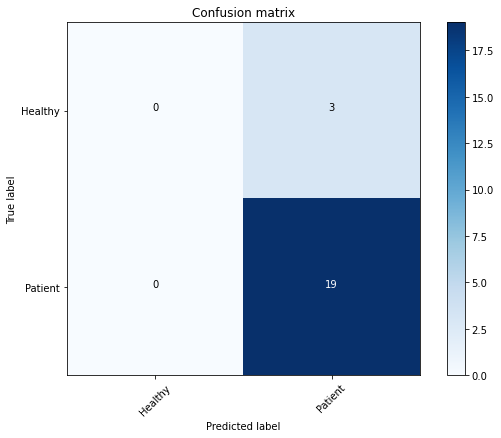

In [6]:


model.summary()

for train_index, test_index in skf.split(X, y):
    pred=model.predict(X[test_index,:])
    cm = confusion_matrix(y[test_index], pred)
    pred = np.argmax(pred,axis=1)

  
# Compute confusion matrix

np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, class_names)





In [7]:

train_accuracy=0
test_accuracy=0
precision=0
recall=0
f1=0

for train_index, test_index in skf.split(X, y):
    train_preds = np.where(model.predict(X[train_index,:]) > 0.5, 1, 0)
    test_preds = np.where(model.predict(X[test_index,:]) > 0.5, 1, 0)
    train_accuracy = train_accuracy+accuracy_score(y[train_index], train_preds)
    test_accuracy =test_accuracy+ accuracy_score(y[test_index], test_preds)
    precision=precision+precision_score(y[test_index], test_preds)
    recall=recall+recall_score(y[test_index], test_preds)
    f1=f1+f1_score(y[test_index], test_preds)

    
 
avg_train=train_accuracy/n_splits
avg_test=test_accuracy/n_splits
avg_precision=precision/n_splits
avg_recall=recall/n_splits
avg_f1=f1/n_splits

print(f'Train Accuracy : {avg_train:.4f}')
print(f'Test Accuracy  : {avg_test:.4f}')


print('Precision: %f' % avg_precision)
print('Recall: %f' % avg_recall)
print('F1 score: %f' % avg_f1)

Train Accuracy : 0.8235
Test Accuracy  : 0.8235
Precision: 0.823518
Recall: 1.000000
F1 score: 0.903159
